In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# %cd /content/drive/MyDrive/Colab_Notebook4/dl_assign3/archive/stocks

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebook4/dl_assign3/archive/stocks'
/content


In [1]:
!wget https://cloudstor.aarnet.edu.au/plus/s/73wqG9XDVpjd4KP/download

--2022-11-22 16:31:27--  https://cloudstor.aarnet.edu.au/plus/s/73wqG9XDVpjd4KP/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=e92k3e04jv73cja2hcmj6g7o0a; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=RiSklY17Vzi3AUXJmmNpqmF8dMYBv0%2FVc2BHYevC5l89XnVSERNT5QhMPKgh83Fn6KP8ZnLG0kkKfmsDaMU0d1cxaxCaQ9j4m7U9eT%2B%2FvsobPLUOxoG1BNjeqF06tt4g; expires=Wed, 23-Nov-2022 16:31:28 GMT; Max-Age=86400; path=/plus;; Secure at position 222.
Length: 541537780 (516M) [application/zip]
Saving to: ‘download’

download            100%[===================>] 516.45M  12.7MB/s    in 36s     

2022-11-22 16:32:05 (14.2 MB/s) - ‘download’ saved [541537780/541537780]



In [2]:
!unzip download

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: archive/stocks/QDEL.csv  
  inflating: __MACOSX/archive/stocks/._QDEL.csv  
  inflating: archive/stocks/ALLO.csv  
  inflating: __MACOSX/archive/stocks/._ALLO.csv  
  inflating: archive/stocks/ALOT.csv  
  inflating: __MACOSX/archive/stocks/._ALOT.csv  
  inflating: archive/stocks/KEYS.csv  
  inflating: __MACOSX/archive/stocks/._KEYS.csv  
  inflating: archive/stocks/BMY.csv  
  inflating: __MACOSX/archive/stocks/._BMY.csv  
  inflating: archive/stocks/UMC.csv  
  inflating: __MACOSX/archive/stocks/._UMC.csv  
  inflating: archive/stocks/PSA.csv  
  inflating: __MACOSX/archive/stocks/._PSA.csv  
  inflating: archive/stocks/BPYPN.csv  
  inflating: __MACOSX/archive/stocks/._BPYPN.csv  
  inflating: archive/stocks/RJA.csv  
  inflating: __MACOSX/archive/stocks/._RJA.csv  
  inflating: archive/stocks/CDMOP.csv  
  inflating: __MACOSX/archive/stocks/._CDMOP.csv  
  inflating: archive/stocks/GSL.csv  
  inflating: __MACOSX/archive/stocks/._GSL.csv  


### ARIMA

In [3]:
import pandas as pd
# data = pd.read_csv("MFA.csv")
data = pd.read_csv("/content/archive/stocks/HPQ.csv")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.131273,0.131273,0.124177,0.124177,0.006887,2480300
1,1962-01-03,0.124177,0.124177,0.121516,0.122846,0.006813,507300
2,1962-01-04,0.122846,0.126838,0.117968,0.120185,0.006666,845500
3,1962-01-05,0.119742,0.119742,0.117525,0.117525,0.006518,338200
4,1962-01-08,0.117525,0.119299,0.115307,0.119299,0.006617,873700
...,...,...,...,...,...,...,...
14658,2020-03-26,15.530000,18.209999,15.310000,17.940001,17.940001,20615300
14659,2020-03-27,17.000000,17.309999,16.120001,16.860001,16.860001,11273200
14660,2020-03-30,16.930000,18.090000,16.549999,17.840000,17.840000,11892700
14661,2020-03-31,17.840000,17.969999,16.930000,17.360001,17.360001,16771900


In [5]:
import csv
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import scipy as stats 
import statsmodels.api as sm 
from scipy import stats 
from statsmodels.tsa.arima_model import ARIMA 
data = pd.read_csv("/content/archive/stocks/HPQ.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.131273,0.131273,0.124177,0.124177,0.006887,2480300
1,1962-01-03,0.124177,0.124177,0.121516,0.122846,0.006813,507300
2,1962-01-04,0.122846,0.126838,0.117968,0.120185,0.006666,845500
3,1962-01-05,0.119742,0.119742,0.117525,0.117525,0.006518,338200
4,1962-01-08,0.117525,0.119299,0.115307,0.119299,0.006617,873700


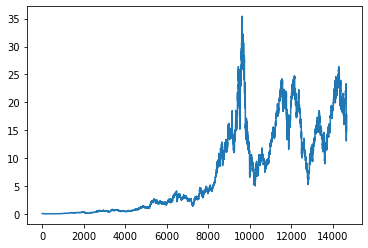

In [6]:
ts=data['Close'] 
ts.plot()   

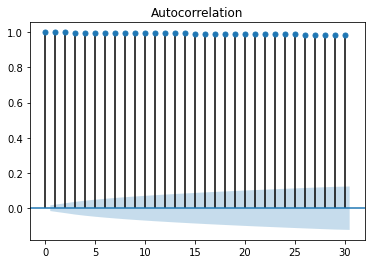

In [7]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(ts,use_vlines=True,lags=30)  
plt.show()

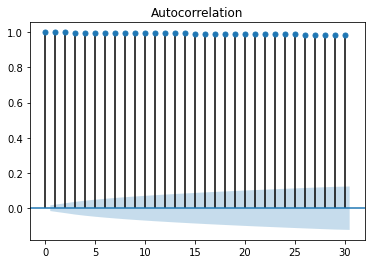

The ADF test result of the original sequence is： 0         0.124177
1         0.122846
2         0.120185
3         0.117525
4         0.119299
           ...    
14658    17.940001
14659    16.860001
14660    17.840000
14661    17.360001
14662    14.840000
Name: Close, Length: 14663, dtype: float64


In [8]:
plot_acf(ts,use_vlines=True,lags=30)  
plt.show()  
print(u'The ADF test result of the original sequence is：', (data[u'Close']))

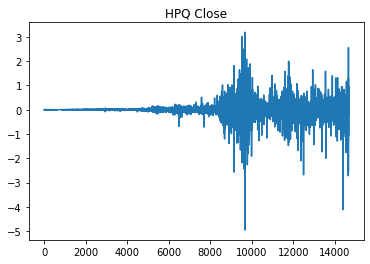

In [9]:
D_ts = ts.diff().dropna()  
D_ts.columns = [u'The differential']
D_ts.plot()  
plt.title("HPQ Close")  
plt.show() 

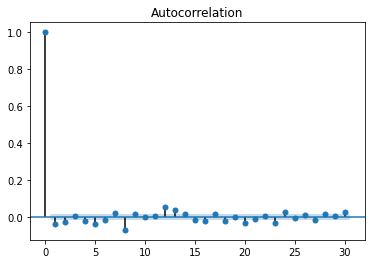

In [10]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(D_ts,use_vlines=True,lags=30)  
plt.show()

In [11]:
from statsmodels.tsa import stattools 
LjungBox=stattools.q_stat(stattools.acf(D_ts)[1:12],len(D_ts)) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [12]:
LjungBox[1][-1]

6.692502208567557e-27

In [13]:
from statsmodels.tsa.arima_model import ARIMA   
model=ARIMA(ts,order=(1,1,0)) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [14]:
result=model.fit(disp=-1) 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                14662
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -925.034
Method:                       css-mle   S.D. of innovations              0.258
Date:                Tue, 22 Nov 2022   AIC                           1856.069
Time:                        16:32:30   BIC                           1878.848
Sample:                             1   HQIC                          1863.635
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.002      0.494      0.621      -0.003       0.005
ar.L1.D.Close    -0.0407      0.008     -4.912      0.000      -0.057      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -24.5943           +0.0000j           24.5943            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
result.conf_int()

,0,1
const,-0.002998,0.005019
ar.L1.D.Close,-0.056885,-0.024434


In [16]:
sm.tsa.arma_order_select_ic(D_ts,max_ar=6,max_ma=4,ic='aic')['aic_min_order'] 
from statsmodels.tsa.arima_model import ARIMA 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
model=ARIMA(ts,order=(2,1,2)) 
result=model.fit(disp=-1) 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                14662
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -904.607
Method:                       css-mle   S.D. of innovations              0.257
Date:                Tue, 22 Nov 2022   AIC                           1821.215
Time:                        16:38:10   BIC                           1866.773
Sample:                             1   HQIC                          1836.347
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.002      0.572      0.567      -0.002       0.005
ar.L1.D.Close    -0.1731      0.060     -2.889      0.004      -0.290      -0.056
ar.L2.D.Close     0.6348      0.055     11.528      0.000       0.527       0.743
ma.L1.D.Close     0.1383      0.057      2.447      0.014       0.028       0.249
ma.L2.D.Close    -0.6848      0.052    -13.188      0.000      -0.787      -0.583
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1262           +0.0000j            1.1262            0.5000
AR.2            1.3988           +0.0000j            1.3988            0.0000
MA.1           -1.1116           +0.0000j            1.1116            0.5000
MA.2            1.3136           +0.0000j            1.3136            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
result.conf_int()

,0,1
const,-0.002485,0.004535
ar.L1.D.Close,-0.290484,-0.055667
ar.L2.D.Close,0.526866,0.742707
ma.L1.D.Close,0.027522,0.249163
ma.L2.D.Close,-0.786611,-0.583055


In [19]:
result.forecast(5)

(array([14.94040595, 14.99058117, 15.0461849 , 15.06896341, 15.10086911]),
 array([0.25736973, 0.35771054, 0.42915243, 0.48850779, 0.53860259]),
 array([[14.43597055, 15.44484135],
        [14.2894814 , 15.69168094],
        [14.20506161, 15.8873082 ],
        [14.11150573, 16.02642109],
        [14.04522744, 16.15651078]]))

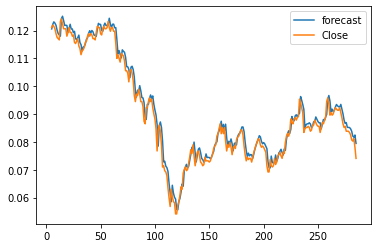

In [20]:
fig = result.plot_predict(5,285) 
plt.show()

### LSTM

In [21]:
import pandas as pd
# data = pd.read_csv("MFA.csv")
data = pd.read_csv("/content/archive/stocks/HPQ.csv")

In [22]:
data = data.sort_values('Date')
print(data.head())
print(data.shape)

         Date      Open      High       Low     Close  Adj Close   Volume
0  1962-01-02  0.131273  0.131273  0.124177  0.124177   0.006887  2480300
1  1962-01-03  0.124177  0.124177  0.121516  0.122846   0.006813   507300
2  1962-01-04  0.122846  0.126838  0.117968  0.120185   0.006666   845500
3  1962-01-05  0.119742  0.119742  0.117525  0.117525   0.006518   338200
4  1962-01-08  0.117525  0.119299  0.115307  0.119299   0.006617   873700
(14663, 7)


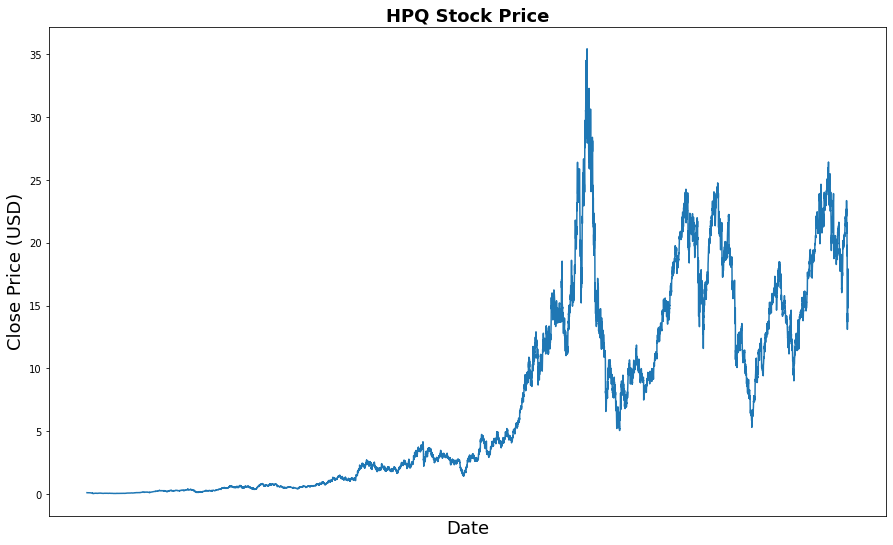

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt.plot(data[['Close']])
plt.xticks([])
plt.title("HPQ Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.savefig('StockPrice.jpg')
plt.show()

In [25]:
price = data[['Close']]
print(price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14663 entries, 0 to 14662
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   14663 non-null  float64
dtypes: float64(1)
memory usage: 229.1 KB
None


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
import numpy as np

def split_data(stock, lookback):
    data_raw = stock.to_numpy()
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]

    return [x_train, y_train, x_test, y_test]

In [28]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (11714, 19, 1)
y_train.shape =  (11714, 1)
x_test.shape =  (2929, 19, 1)
y_test.shape =  (2929, 1)


In [29]:
import torch
import torch.nn as nn

x_train      = torch.from_numpy(x_train).type(torch.Tensor)
x_test       = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm  = torch.from_numpy(y_test).type(torch.Tensor)



input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [30]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [31]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time() - start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5456961989402771
Epoch  1 MSE:  0.3420538008213043
Epoch  2 MSE:  0.17125871777534485
Epoch  3 MSE:  0.12275735288858414
Epoch  4 MSE:  0.15391473472118378
Epoch  5 MSE:  0.09760813415050507
Epoch  6 MSE:  0.0947815403342247
Epoch  7 MSE:  0.1048600897192955
Epoch  8 MSE:  0.1010405421257019
Epoch  9 MSE:  0.08189582079648972
Epoch  10 MSE:  0.05810433626174927
Epoch  11 MSE:  0.0468473806977272
Epoch  12 MSE:  0.05137665942311287
Epoch  13 MSE:  0.039358459413051605
Epoch  14 MSE:  0.014118778519332409
Epoch  15 MSE:  0.010153639130294323
Epoch  16 MSE:  0.023506278172135353
Epoch  17 MSE:  0.01708449050784111
Epoch  18 MSE:  0.010028006508946419
Epoch  19 MSE:  0.01603206992149353
Epoch  20 MSE:  0.014392084442079067
Epoch  21 MSE:  0.00581981148570776
Epoch  22 MSE:  0.0028984397649765015
Epoch  23 MSE:  0.006328050047159195
Epoch  24 MSE:  0.009812936186790466
Epoch  25 MSE:  0.009824510663747787
Epoch  26 MSE:  0.007166613359004259
Epoch  27 MSE:  0.00462519191205

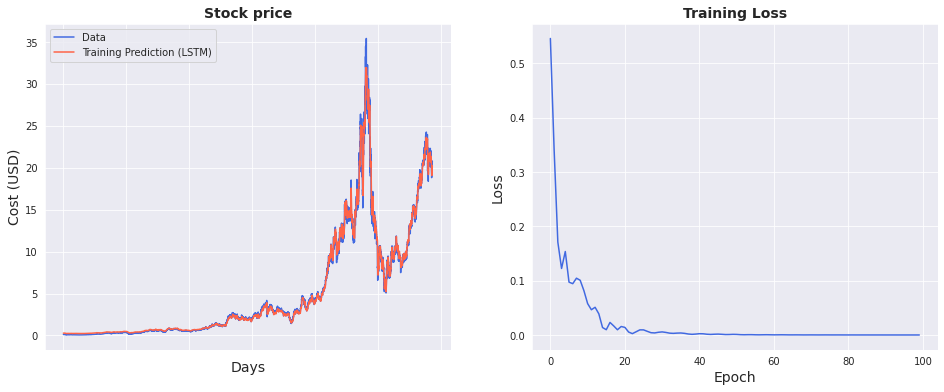

In [33]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')

ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)
plt.show()

In [35]:
import math, time
from sklearn.metrics import mean_squared_error

y_test_pred = model(x_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train      = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred  = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test       = scaler.inverse_transform(y_test_lstm.detach().numpy())

trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 0.38 RMSE
Test Score: 0.60 RMSE


In [36]:
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))
predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [37]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0], mode='lines', name='Train prediction')))
fig.add_trace(go.Scatter( x=result.index, y=result[1], mode='lines', name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2], mode='lines', name='Actual Value')))


fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'simple_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

------
### Informer


In [38]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 573, done.
remote: Total 573 (delta 0), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (573/573), 6.48 MiB | 24.40 MiB/s, done.
Resolving deltas: 100% (328/328), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (62/62), done.
archive   ETDataset	__MACOSX     StockPrice.jpg
download  Informer2020	sample_data


In [40]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [42]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch
import pandas as pd 

In [50]:
data = pd.read_csv("/content/ETDataset/ETT-small/ETTh1.csv")
index = data.iloc[:,0][:14663]
index

0        2016-07-01 00:00:00
1        2016-07-01 01:00:00
2        2016-07-01 02:00:00
3        2016-07-01 03:00:00
4        2016-07-01 04:00:00
                ...         
14658    2018-03-03 18:00:00
14659    2018-03-03 19:00:00
14660    2018-03-03 20:00:00
14661    2018-03-03 21:00:00
14662    2018-03-03 22:00:00
Name: date, Length: 14663, dtype: object

In [51]:
data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [63]:
data = pd.read_csv('/content/archive/stocks/HPQ.csv')
data = data.drop(labels='Volume',axis=1)
data.iloc[:,0] = index

In [64]:
data

,Date,Open,High,Low,Close,Adj Close
0,2016-07-01 00:00:00,0.131273,0.131273,0.124177,0.124177,0.006887
1,2016-07-01 01:00:00,0.124177,0.124177,0.121516,0.122846,0.006813
2,2016-07-01 02:00:00,0.122846,0.126838,0.117968,0.120185,0.006666
3,2016-07-01 03:00:00,0.119742,0.119742,0.117525,0.117525,0.006518
4,2016-07-01 04:00:00,0.117525,0.119299,0.115307,0.119299,0.006617
...,...,...,...,...,...,...
14658,2018-03-03 18:00:00,15.530000,18.209999,15.310000,17.940001,17.940001
14659,2018-03-03 19:00:00,17.000000,17.309999,16.120001,16.860001,16.860001
14660,2018-03-03 20:00:00,16.930000,18.090000,16.549999,17.840000,17.840000
14661,2018-03-03 21:00:00,17.840000,17.969999,16.930000,17.360001,17.360001


In [65]:
data.columns =["date"	,"HUFL"	,"HULL"	,"MUFL"	,"MULL","OT"] 
data

,date,HUFL,HULL,MUFL,MULL,OT
0,2016-07-01 00:00:00,0.131273,0.131273,0.124177,0.124177,0.006887
1,2016-07-01 01:00:00,0.124177,0.124177,0.121516,0.122846,0.006813
2,2016-07-01 02:00:00,0.122846,0.126838,0.117968,0.120185,0.006666
3,2016-07-01 03:00:00,0.119742,0.119742,0.117525,0.117525,0.006518
4,2016-07-01 04:00:00,0.117525,0.119299,0.115307,0.119299,0.006617
...,...,...,...,...,...,...
14658,2018-03-03 18:00:00,15.530000,18.209999,15.310000,17.940001,17.940001
14659,2018-03-03 19:00:00,17.000000,17.309999,16.120001,16.860001,16.860001
14660,2018-03-03 20:00:00,16.930000,18.090000,16.549999,17.840000,17.840000
14661,2018-03-03 21:00:00,17.840000,17.969999,16.930000,17.360001,17.360001


In [66]:
data['LULL'] = data.MULL
data['LUFL'] = data.MUFL

In [67]:
order = ['date', 'HUFL', 'HULL', 'LUFL', 'LULL', 'MUFL', 'MULL', 'OT']
data = data[order]

In [68]:
data.to_csv('/content/ETDataset/ETT-small/ETTh1.csv',index = False)

In [69]:
data = pd.read_csv("/content/ETDataset/ETT-small/ETTh1.csv")
data

,date,HUFL,HULL,LUFL,LULL,MUFL,MULL,OT
0,2016-07-01 00:00:00,0.131273,0.131273,0.124177,0.124177,0.124177,0.124177,0.006887
1,2016-07-01 01:00:00,0.124177,0.124177,0.121516,0.122846,0.121516,0.122846,0.006813
2,2016-07-01 02:00:00,0.122846,0.126838,0.117968,0.120185,0.117968,0.120185,0.006666
3,2016-07-01 03:00:00,0.119742,0.119742,0.117525,0.117525,0.117525,0.117525,0.006518
4,2016-07-01 04:00:00,0.117525,0.119299,0.115307,0.119299,0.115307,0.119299,0.006617
...,...,...,...,...,...,...,...,...
14658,2018-03-03 18:00:00,15.530000,18.209999,15.310000,17.940001,15.310000,17.940001,17.940001
14659,2018-03-03 19:00:00,17.000000,17.309999,16.120001,16.860001,16.120001,16.860001,16.860001
14660,2018-03-03 20:00:00,16.930000,18.090000,16.549999,17.840000,16.549999,17.840000,17.840000
14661,2018-03-03 21:00:00,17.840000,17.969999,16.930000,17.360001,16.930000,17.360001,17.360001


In [70]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]
args.data = 'ETTh1' # data
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'ETTh1.csv' # data file

# args.root_path = './archive/stocks' # root path of data file
# args.data_path = 'ACHC.csv' # data file


args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'd' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length

# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 300
args.patience = 5
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [71]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [72]:
data_parser = {'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [73]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [74]:
print('Args in experiment:')
dict(args)

Args in experiment:


{'model': 'informer',
 'data': 'ETTh1',
 'root_path': './ETDataset/ETT-small/',
 'data_path': 'ETTh1.csv',
 'features': 'MS',
 'target': 'OT',
 'freq': 'h',
 'checkpoints': './informer_checkpoints',
 'seq_len': 96,
 'label_len': 48,
 'pred_len': 24,
 'enc_in': 7,
 'dec_in': 7,
 'c_out': 1,
 'factor': 5,
 'd_model': 512,
 'n_heads': 8,
 'e_layers': 2,
 'd_layers': 1,
 'd_ff': 2048,
 'dropout': 0.05,
 'attn': 'prob',
 'embed': 'timeF',
 'activation': 'gelu',
 'distil': True,
 'output_attention': False,
 'mix': True,
 'padding': 0,
 'batch_size': 32,
 'learning_rate': 0.0001,
 'loss': 'mse',
 'lradj': 'type1',
 'use_amp': False,
 'num_workers': 0,
 'itr': 1,
 'train_epochs': 300,
 'patience': 5,
 'des': 'exp',
 'use_gpu': True,
 'gpu': 0,
 'use_multi_gpu': False,
 'devices': '0,1,2,3',
 'detail_freq': 'h'}

In [75]:
Exp = Exp_Informer

In [76]:
for ii in range(args.itr):
  
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, 
                args.d_layers, args.d_ff, args.attn, args.factor, args.embed, 
                args.distil, args.mix, args.des, ii)


    exp = Exp(args)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)
    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_ETTh1_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.0255871
	speed: 0.1410s/iter; left time: 11234.0737s
	iters: 200, epoch: 1 | loss: 0.0166604
	speed: 0.0685s/iter; left time: 5456.0008s
Epoch: 1 cost time: 25.535383939743042
Epoch: 1, Steps: 266 | Train Loss: 0.0928499 Vali Loss: 50.2211952 Test Loss: 273.1036987
Validation loss decreased (inf --> 50.221195).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.0231027
	speed: 0.1609s/iter; left time: 12784.3927s
	iters: 200, epoch: 2 | loss: 0.0131918
	speed: 0.0699s/iter; left time: 5547.0677s
Epoch: 2 cost time: 18.715216875076294
Epoch: 2, Steps: 266 | Train Loss: 0.0160509 Vali Loss: 50.6227112 Test Loss: 273.0844727
EarlyStopping counter: 1 out of 5
Updating learning rate to 5e-05
	iters: 100, epoch: 3 | loss: 0.0107688
	spee

In [77]:
import os

setting = 'informer_ETTh1_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# setting = 'informer_ETTh2_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0' 

In [78]:
exp = Exp(args)
exp.predict(setting, True)

Use GPU: cuda:0
pred 1


In [79]:
import numpy as np
prediction = np.load('./results/'+setting+'/real_prediction.npy')
prediction.shape

(1, 24, 1)

In [80]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        print("======================================")
        print(best_model_path)
        print("======================================")

        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)

        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device) 
        pred = outputs.detach().cpu().numpy()#.squeeze()
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds


In [81]:
prediction = predict(exp, setting, True)

pred 1
./informer_checkpoints/informer_ETTh1_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0/checkpoint.pth


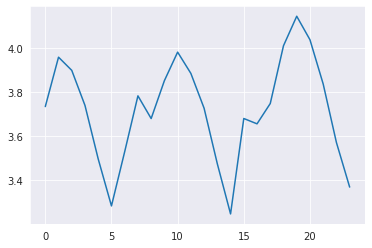

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

In [83]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [84]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [85]:
len(data_set), len(data_loader)

(1, 1)

In [86]:
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

preds.shape, trues.shape

((2848, 24, 1), (2848, 24, 1))

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

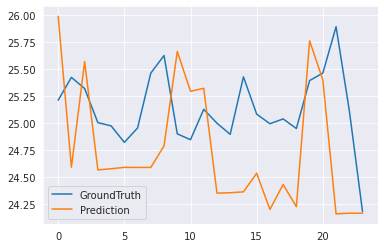

In [88]:
# draw OT prediction
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(31-preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

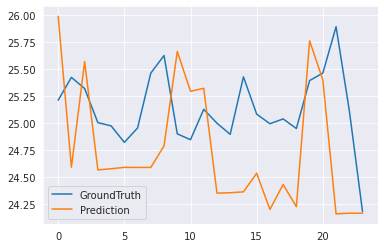

In [89]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(31-preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

In [90]:
from data.data_loader import Dataset_ETT_hour
from torch.utils.data import DataLoader

Data = Dataset_ETT_hour
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [92]:
import os

args.output_attention = True
exp = Exp(args)
model = exp.model

setting = 'informer_ETTh1_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [93]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.float().to(exp.device)
    batch_y = batch_y.float()

    batch_x_mark = batch_x_mark.float().to(exp.device)
    batch_y_mark = batch_y_mark.float().to(exp.device)
    
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).float()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).float().to(exp.device)
    
    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

In [94]:
attn[0].shape, attn[1].shape #, attn[2].shape

(torch.Size([1, 8, 96, 96]), torch.Size([1, 8, 48, 48]))

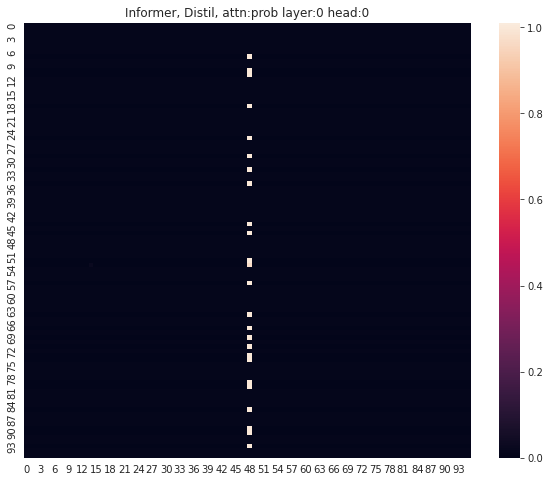

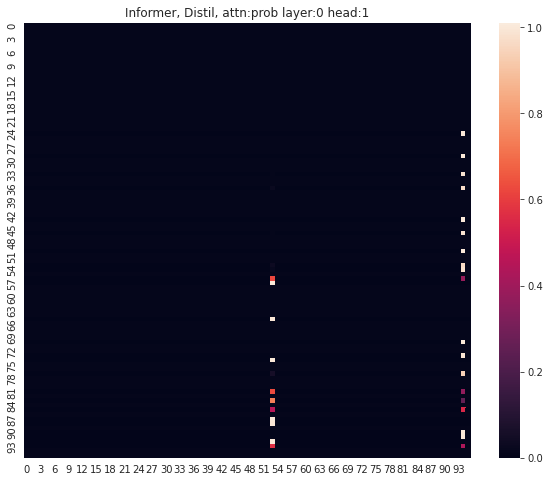

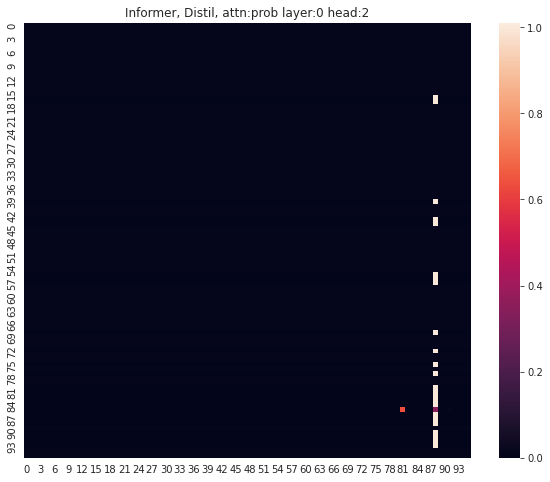

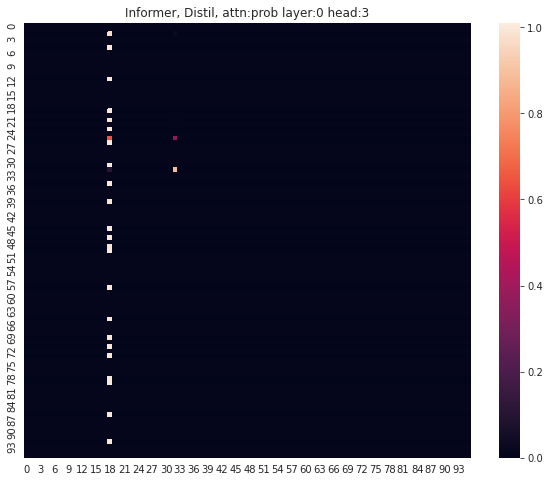

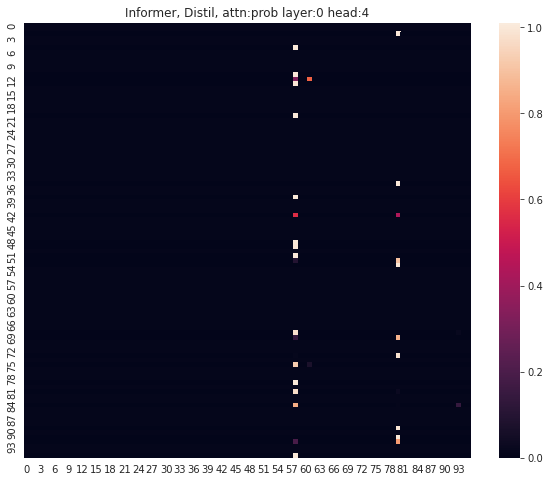

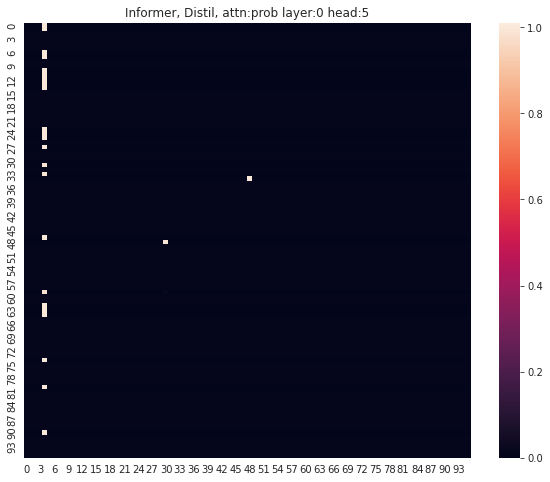

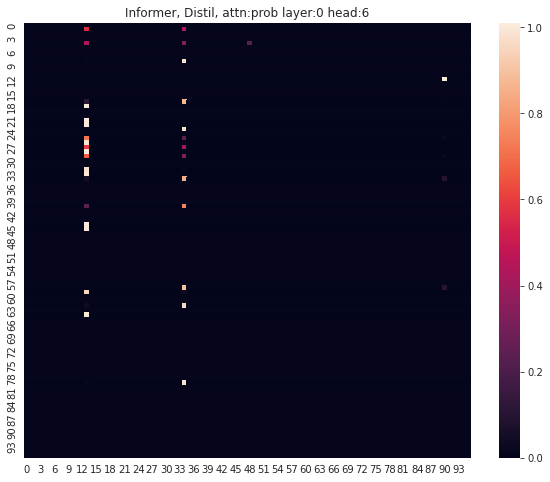

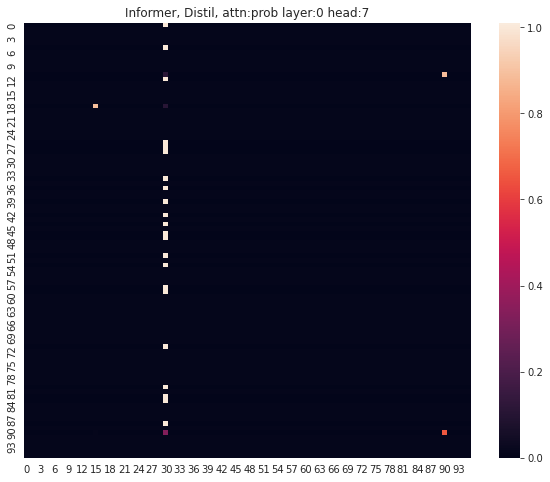

In [95]:
layer = 0
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

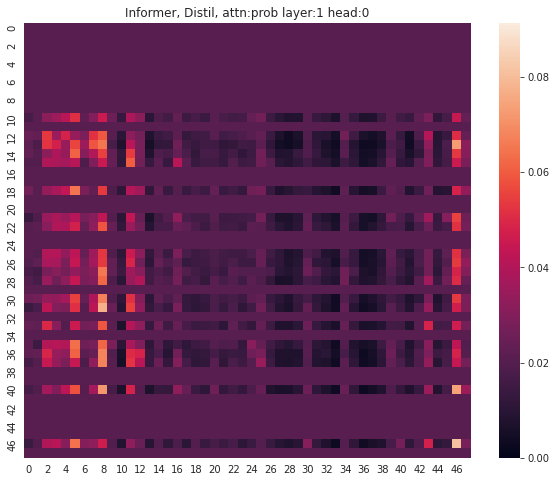

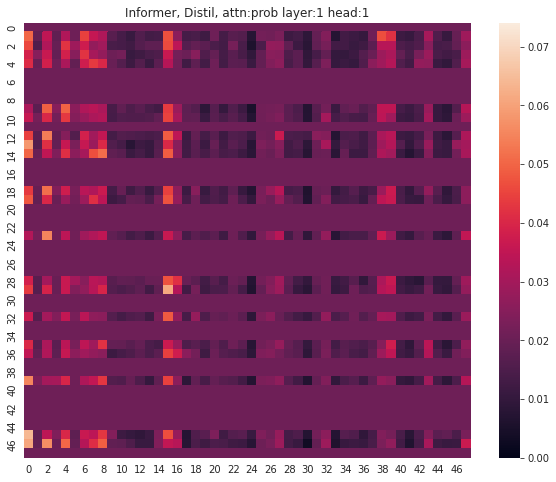

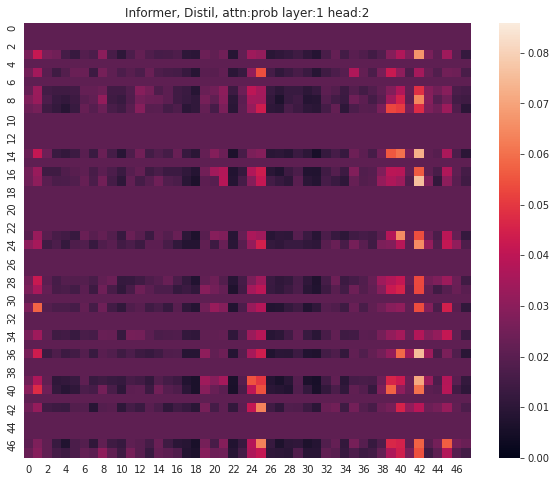

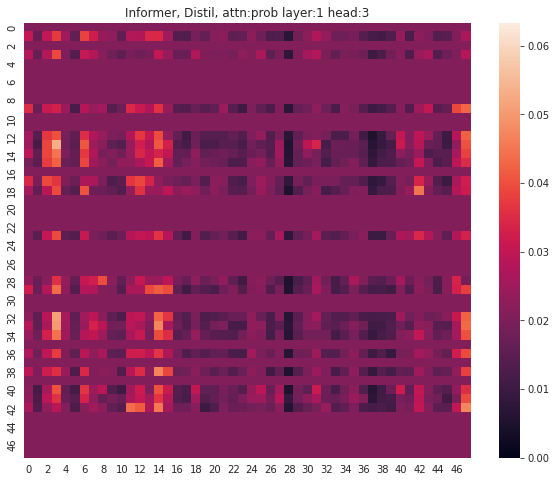

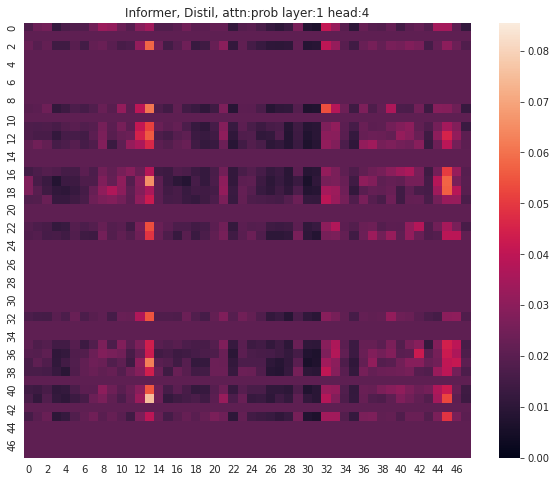

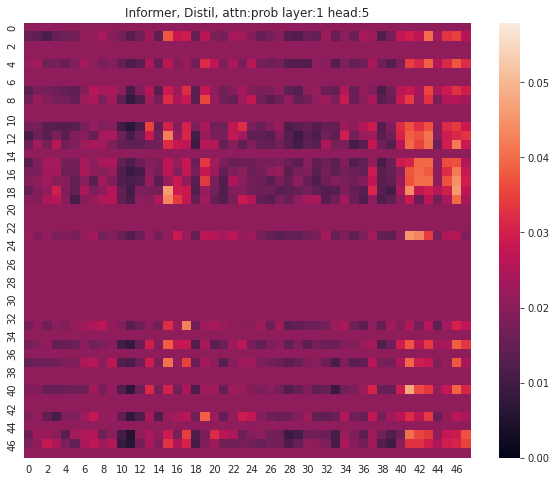

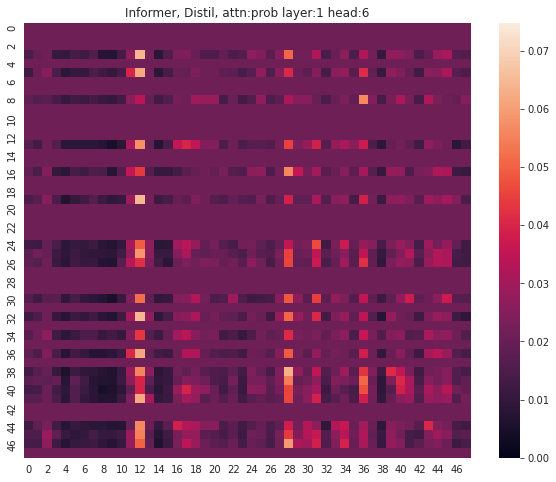

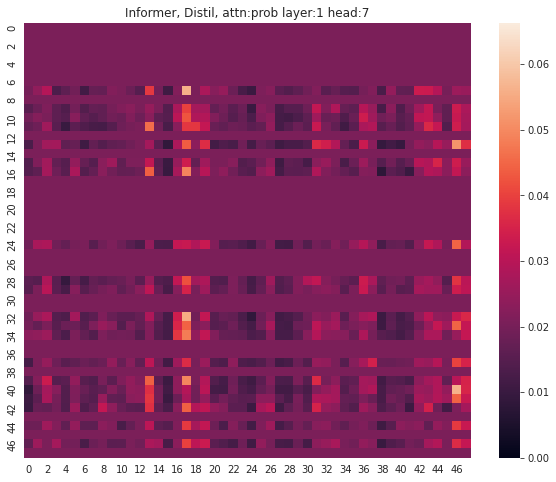

In [96]:
layer = 1
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()